<a href="https://colab.research.google.com/github/Rociosamudio/Machine-Learning-Data-Science-II/blob/main/actividad_pr%C3%A1ctica_APIS_%22LizRocio_SamudioRuiz%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Introduccion

Este dataset contiene datos de cuanta energia se produce a partir de diferentes fuentes, cuenta con datos de preccios y la carga total desde el 2015 hasta el 2018.
Los datos recopilados pueden ser empleados para entrenar algoritmos de aprendizaje automático, con modelos de series temporales. Al comprender las relaciones entre estos factores, podremos anticipar con mayor precisión la demanda energética, lo que permitirá optimizar la planificación de la producción y distribución de energía, y así lograr una gestión más eficiente de los recursos. Teniendo en cuenta estos datos tengo las siguientes hipotesis.


- LA primera es que existe una relacion lineal positiva entre la prevision ed carga total de energia y la carga real, entonces de esta manera decimos que si la previsión de cuánta energía se va a necesitar es alta, entonces la cantidad real de energía que se consuma también será alta, y viceversa. Considero esta hipotesis debido a que si la gente consume mucha energia se debe preveer de antemano el consumo.


- Mi siguiente hipotesis es que la distribucion de la energia solar a lo largo del tiempo muestra una consentracion significativa alrededor del medio dia.

-  Otra de las hipotesis que me surgen es que existe una correlacion entre la  generación de energía solar y la generación de energía eólica terrestre, donde los días con mayor generación solar también tienden a tener mayor generación eólica.


- La ultima hipotesis, Si se espera que la demanda de energía sea alta, se utiliza más energía fósil para satisfacer esa demanda.

Para probar mis Hipotesis vamos al analisis de datos!!!

Dataset obtenido de
https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?resource=download

In [81]:
ruta_archivo = '/content/drive/MyDrive/Data Science II Liz_Rocio_Samudio_Ruiz/energy_DF.csv'

In [82]:
df = pd.read_csv(ruta_archivo)


In [ ]:
df.shape #cantidad de filas y columnas

(35064, 31)

In [83]:
df.columns #noombre de las columnas

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'generation biomass ', 'ggeneration fossil oil'],
      dtype='object')

El nombre de las columnas de DF original me las trae en ingles, para mi personalmente es un poco mas practico en este caso traducirlas al español y renombrarlas.

In [84]:
traduccion = {
    'time': 'tiempo',
    'generation biomass': 'generación biomasa',
    'generation fossil brown coal/lignite': 'generación fósil carbón pardo/lignito',
    'generation fossil coal-derived gas': 'generación fósil gas derivado del carbón',
    'generation fossil gas': 'generación fósil gas',
    'generation fossil hard coal': 'generación fósil carbón duro',
    'generation fossil oil': 'generación fósil petróleo',
    'generation fossil oil shale': 'generación fósil esquisto bituminoso',
    'generation fossil peat': 'generación fósil turba',
    'generation geothermal': 'generación geotérmica',
    'generation hydro pumped storage aggregated': 'generación hidro bombeo almacenamiento agregado',
    'generation hydro pumped storage consumption': 'generación hidro bombeo almacenamiento consumo',
    'generation hydro run-of-river and poundage': 'generación hidro pasada por río y embalse',
    'generation hydro water reservoir': 'generación hidro embalse',
    'generation marine': 'generación marina',
    'generation nuclear': 'generación nuclear',
    'generation other': 'generación otra',
    'generation other renewable': 'generación otra renovable',
    'generation solar': 'generación solar',
    'generation waste': 'generación residuos',
    'generation wind offshore': 'generación eólica marina',
    'generation wind onshore': 'generación eólica terrestre',
    'forecast solar day ahead': 'previsión solar para el día siguiente',
    'forecast wind offshore eday ahead': 'previsión eólica marina para el día siguiente',
    'forecast wind onshore day ahead': 'previsión eólica terrestre para el día siguiente',
    'total load forecast': 'previsión de carga total',
    'total load actual': 'carga total real',
    'price day ahead': 'precio para el día siguiente',
    'price actual': 'precio real'
}

df = df.rename(columns=traduccion)# Renombrar las columnas del DataFrame
print(df.head())# Mostrar las primeras filas del DataFrame

                      tiempo  generación biomasa  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generación fósil carbón pardo/lignito  \
0                                  329.0   
1                                  328.0   
2                                  323.0   
3                                  254.0   
4                                  187.0   

   generación fósil gas derivado del carbón  generación fósil gas  \
0                                       0.0                4844.0   
1                                       0.0                5196.0   
2                                       0.0                4857.0   
3                                       0.0                4314.0   
4                                       0.0                4130.0   

   gene

In [85]:
print(df.dtypes)

tiempo                                               object
generación biomasa                                  float64
generación fósil carbón pardo/lignito               float64
generación fósil gas derivado del carbón            float64
generación fósil gas                                float64
generación fósil carbón duro                        float64
generación fósil petróleo                           float64
generación fósil esquisto bituminoso                float64
generación fósil turba                              float64
generación geotérmica                               float64
generación hidro bombeo almacenamiento agregado     float64
generación hidro bombeo almacenamiento consumo      float64
generación hidro pasada por río y embalse           float64
generación hidro embalse                            float64
generación marina                                   float64
generación nuclear                                  float64
generación otra                         

Observo que tiempo es una variable object y la pasare a formato date para poder conservar toda la información de tiempo e interpretar los resultados correctamente. Lo hare mas adelante por ahora avanzo en mis Datos nulos.

#Diccionario de Variables
**Generación de Electricidad por Fuente**

tiempo: Indica el período de tiempo al que corresponden los datos (hora, día, etc.).

generación biomasa: Cantidad de electricidad generada a partir de biomasa (materia orgánica renovable).

generación fósil carbón pardo/lignito: Electricidad generada con carbón de baja calidad (lignito).

generación fósil gas derivado del carbón: Electricidad generada a partir de gas sintético obtenido del carbón.

generación fósil gas: Electricidad generada con gas natural.

generación fósil carbón duro: Electricidad generada con carbón de alta calidad (antracita, hulla).

generación fósil petróleo: Electricidad generada con petróleo.

generación fósil esquisto bituminoso: Electricidad generada a partir de rocas sedimentarias que contienen materia orgánica.

generación fósil turba: Electricidad generada con turba (combustible fósil similar al carbón).

generación geotérmica: Electricidad generada a partir del calor natural de la Tierra.

generación hidro bombeo almacenamiento agregado: Electricidad generada por centrales hidroeléctricas que bombean agua a un embalse para su uso posterior.

generación hidro bombeo almacenamiento consumo: Similar a la anterior, pero enfocada en el consumo de energía para el bombeo.

generación hidro pasada por río y embalse: Electricidad generada por centrales hidroeléctricas convencionales.

generación hidro embalse: Electricidad generada por centrales hidroeléctricas que utilizan un embalse.

generación marina: Electricidad generada a partir de la energía de las olas, mareas o corrientes marinas.

generación nuclear: Electricidad generada en centrales nucleares.

generación otra: Electricidad generada a partir de otras fuentes no especificadas.

generación otra renovable: Electricidad generada a partir de otras fuentes renovables no especificadas.

generación solar: Electricidad generada a partir de la energía solar (fotovoltaica o térmica).

generación residuos: Electricidad generada a partir de la incineración de residuos.

generación eólica marina: Electricidad generada por parques eólicos marinos.

generación eólica terrestre: Electricidad generada por parques eólicos terrestres.

**Previsión y Datos de Generación Renovable**

previsión solar para el día siguiente: Predicción de la generación solar para el día siguiente.

previsión eólica marina para el día siguiente: Predicción de la generación eólica marina para el día siguiente.

previsión eólica terrestre para el día siguiente: Predicción de la generación eólica terrestre para el día siguiente.

**Carga y Precio de la Electricidad**

previsión de carga total: Predicción de la demanda total de electricidad.
carga total real: Demanda real de electricidad.

precio para el día siguiente: Precio de la electricidad para el día siguiente (puede variar según la hora).

precio real: Precio real de la electricidad.




In [86]:
df.head() # vemos las 5 primeras filas del DF, los nombres y tipos de datos que contiene

,tiempo,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,NaN,NaN
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,NaN,NaN
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,NaN,NaN
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,NaN,NaN
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,NaN,NaN


In [89]:
df.tail()

,tiempo,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02,NaN,NaN
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16,NaN,NaN
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30,NaN,NaN
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89,NaN,NaN
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,NaN,NaN


In [90]:
df.describe() # muestra un resumen estadístico de las columnas numéricas DF


,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,generación hidro bombeo almacenamiento agregado,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,34821.000000,35046.0,35046.0,35046.0,0.0,...,35046.000000,35064.000000,0.0,35064.000000,35064.000000,34580.000000,35064.000000,35064.000000,0.0,0.0
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.337210,0.0,0.0,0.0,NaN,...,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28697.198265,49.874341,57.884023,NaN,NaN
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.539683,0.0,0.0,0.0,NaN,...,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4573.106858,14.618900,14.204083,NaN,NaN
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,NaN,NaN
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,2933.000000,69.000000,NaN,2979.000000,24793.750000,24811.750000,41.490000,49.347500,NaN,NaN
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,4849.000000,576.000000,NaN,4855.000000,28906.000000,28900.000000,50.520000,58.020000,NaN,NaN
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32193.000000,60.530000,68.010000,NaN,NaN
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,NaN,NaN


Hasta aqui vemos diferentes fuentes de generación de energía y cuanta energia se genero a partir de cada fuente. Ademas de otros datos relevantes como el precio. Datos recolectaodos durante 3 años, con horarios y fechas desde el 2015 al 2018.

Se púede hacer las siguientes OBS en una primera mirada:
- Hay mas dependencia de los combustibles fosiles (carbón, gas, petróleo) tiene valores promedio y máximos significativamente más altos que las fuentes renovables.
-La generacion Hidroelectrica, muestrra valores considerables como fuente de energía y posible apoyo para la gestión de la demanda.
- LA fuente renovable fuente marina, terrestre y la solar muestran valores que sugieren un potencial de crecimiento importante. Sus valores promedio son más bajos,tabine esto indica una menor contribución a la generación del total.



In [91]:
df.isnull().values.any()

True

In [92]:
print(df.isnull().sum())

tiempo                                                  0
generación biomasa                                     19
generación fósil carbón pardo/lignito                  18
generación fósil gas derivado del carbón               18
generación fósil gas                                   18
generación fósil carbón duro                           18
generación fósil petróleo                             243
generación fósil esquisto bituminoso                   18
generación fósil turba                                 18
generación geotérmica                                  18
generación hidro bombeo almacenamiento agregado     35064
generación hidro bombeo almacenamiento consumo         19
generación hidro pasada por río y embalse              19
generación hidro embalse                               18
generación marina                                     219
generación nuclear                                     17
generación otra                                        18
generación otr

In [93]:
df.eq(0).sum()

,0
tiempo,0
generación biomasa,4
generación fósil carbón pardo/lignito,10517
generación fósil gas derivado del carbón,35046
generación fósil gas,1
generación fósil carbón duro,3
generación fósil petróleo,3
generación fósil esquisto bituminoso,35046
generación fósil turba,35046
generación geotérmica,35046


#Visualizacion de Nulos


<Axes: >

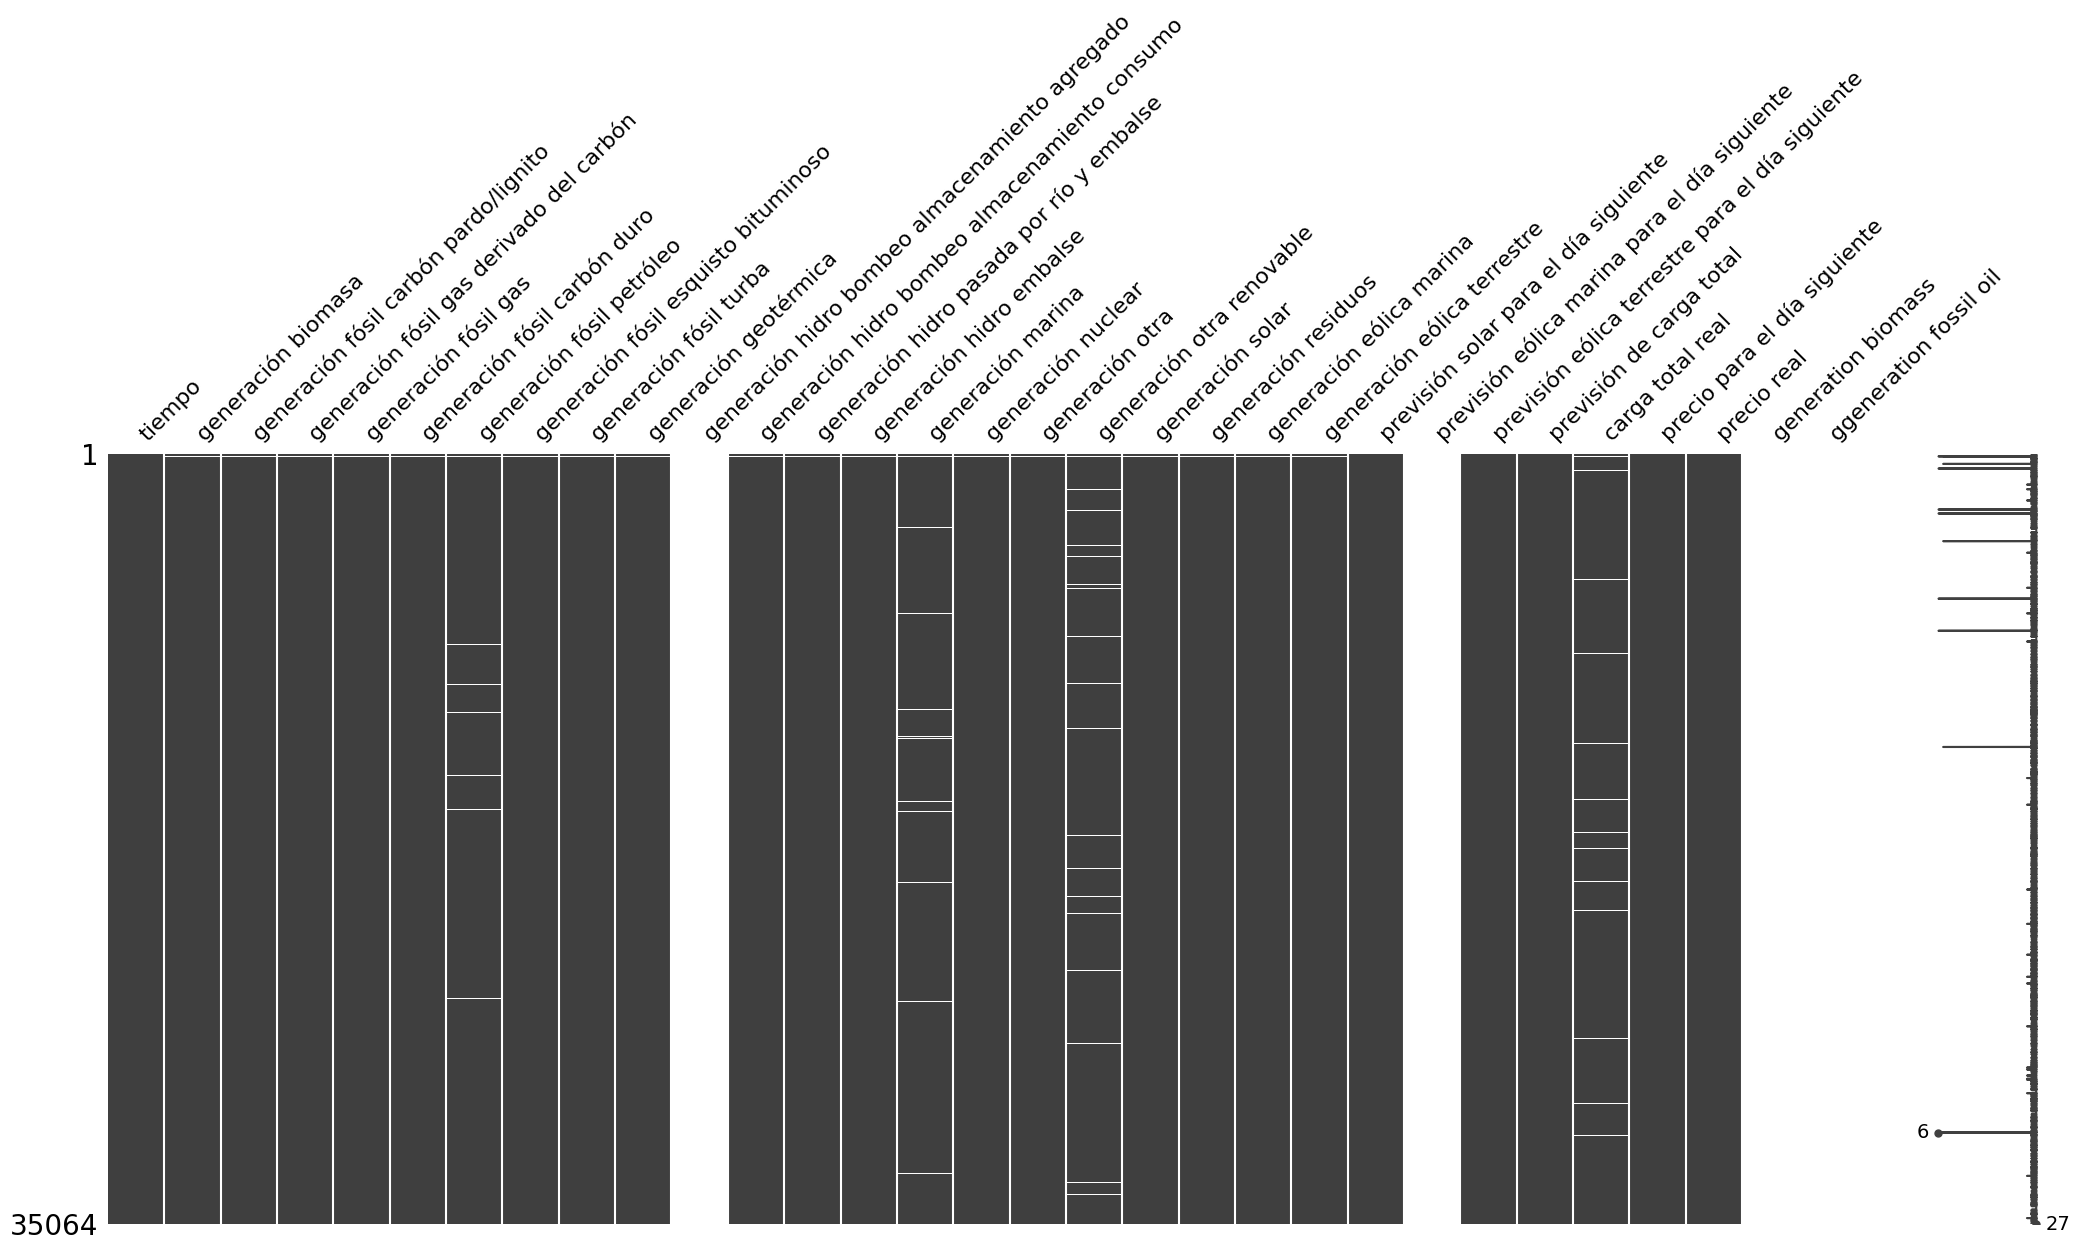

In [94]:
msno.matrix(df)

Con esta matrix de msmo se ve a simple vista las Columnas vacias, que considero que podria estar faltando por Error de registro, o datos no disponible0s. al ver que estan vacias por completo las voy a eliminar de mi Dataframe.

Los valores nulos de generación fósil petróleo que tiene 243 valores faltantes que las voy a reemplazar con la mediana porque la distribución general de los datos no son muy altos o muy bahos a diferencia del promedio.

Valores faltantes en generacion marina me encuentro en una duda con esto para tomar una decision debido a que podria ser un errores de medicion o no hubo generacion en esos periodos. Eliminar estos datos podria sesgar el analisis, voy a realizar un grafico comparativo del df actual y otra con el reemplazo por la mediana. De acuerdo a eso tomare la decision.

Generacion otra renovable no tiene valores extremos, lo voy a reemplazar por la mediana. algunas filas pueden ser menos relevantes, aunque eliminar estos datos  puede afectar a la prediccion.





##1 Reemplazo de nulos

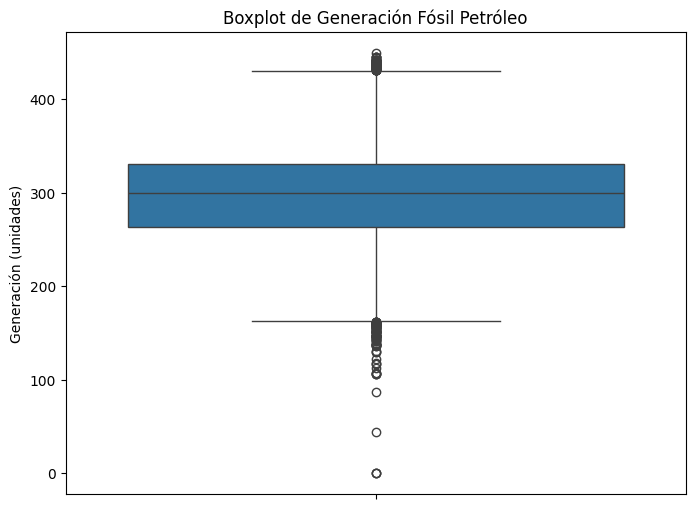

In [95]:
#Boxplot para revisar el reemplazo de nulos de generacion fosil

plt.figure(figsize=(8, 6))
sns.boxplot(y='generación fósil petróleo', data=df)
plt.title('Boxplot de Generación Fósil Petróleo')
plt.ylabel('Generación (unidades)')
plt.show()


Observando este grafico, imputo con mas seguridad los nulos con la mediana, que segun el describe se veia mas robusto y no se vera tan afectada.

In [96]:
# Calculo de la mediana
mediana_petroleo = df['generación fósil petróleo'].median()

# Reemplazo los valores nulos por la mediana
df['generación fósil petróleo'].fillna(mediana_petroleo, inplace=True)

<ipython-input-96-bb44c1068492>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación fósil petróleo'].fillna(mediana_petroleo, inplace=True)


## 2 Reemplazo de nulos

<ipython-input-97-5a1c143412f7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['generación marina'].fillna(mediana_marina, inplace=True)


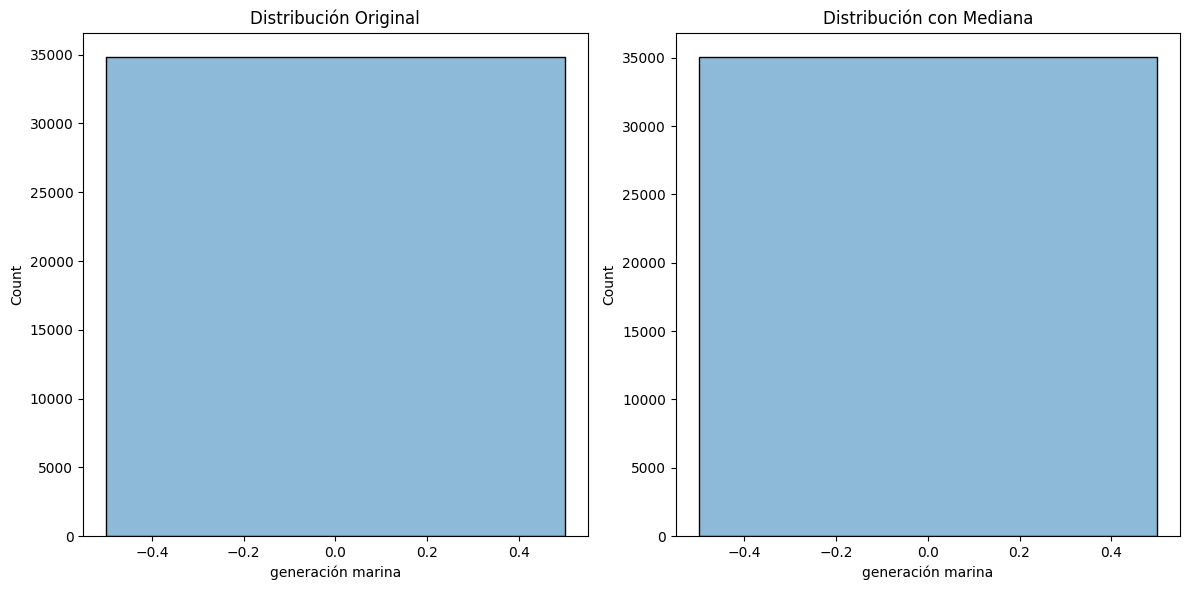

In [97]:

# Valores faltantes en generacion marina
#Realizo una copia del DataFrame original para no modificar los datos originales
df_copia = df.copy()

#Imputo los valores faltantes con la mediana
mediana_marina = df_copia['generación marina'].median()
df_copia['generación marina'].fillna(mediana_marina, inplace=True)

#gráfico de comparación
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  #Subgráfico de Distribución original
sns.histplot(df['generación marina'], kde=True)
plt.title('Distribución Original')

plt.subplot(1, 2, 2)  #Subgráfico de Distribución con mediana
sns.histplot(df_copia['generación marina'], kde=True)
plt.title('Distribución con Mediana')

plt.tight_layout()  # este item Ajusta los subgráficos para que no se superpongan
plt.show()

LA distribucion original sugiere que la mayoria de los datos son iguales o parecidos. es por esto que la mediana seria un valor mas representativo apra imputar los nulos.

In [98]:
# Calculo de la mediana de
mediana_marina = df['generación marina'].median()

# Reemplazo los valores nulos por la mediana
df['generación marina'].fillna(mediana_marina, inplace=True)

<ipython-input-98-81d8a5f4d68f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación marina'].fillna(mediana_marina, inplace=True)


## 3 Reemplazo de nulos

<ipython-input-99-da9563f148d2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['generación otra renovable'].fillna(mediana_otra_renovable, inplace=True)


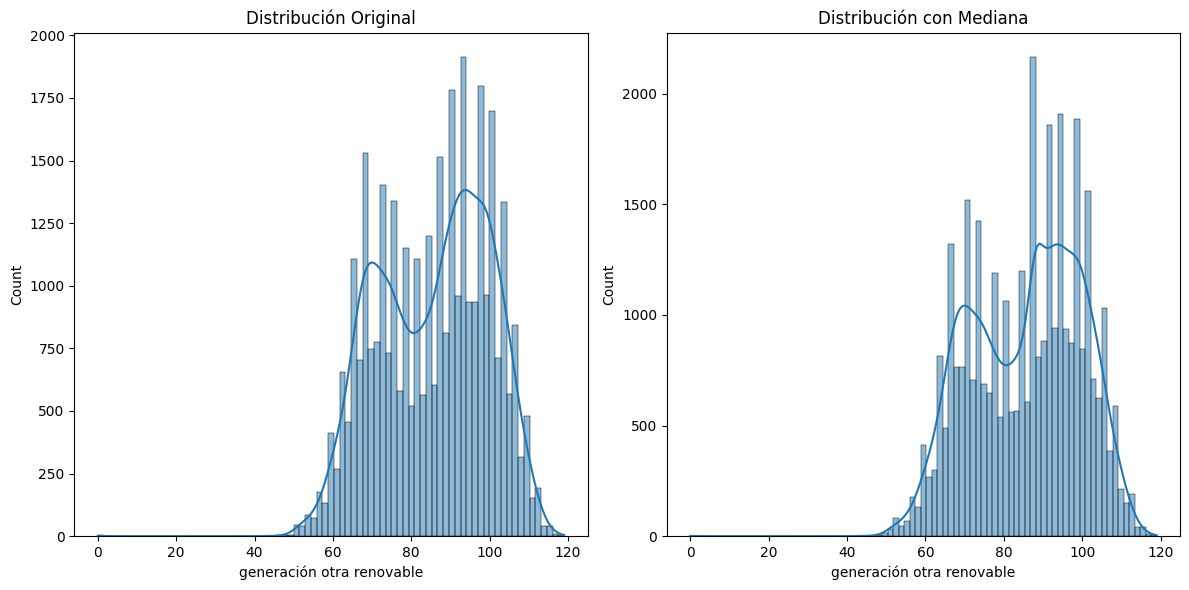

In [99]:
#copia del DataFrame original para no modificar los datos originales
df_copia = df.copy()

# Imputo los valores faltantes con la mediana
mediana_otra_renovable = df_copia['generación otra renovable'].median()
df_copia['generación otra renovable'].fillna(mediana_otra_renovable, inplace=True)

#gráfico de comparación
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico de Distribución original
sns.histplot(df['generación otra renovable'], kde=True)
plt.title('Distribución Original')

plt.subplot(1, 2, 2)  # Subgráfico de Distribución con mediana
sns.histplot(df_copia['generación otra renovable'], kde=True)
plt.title('Distribución con Mediana')

plt.tight_layout()  # Ajusto los subgráficos para que no se superpongan
plt.show()

el Grafico 1 que es el original nos demuestra una distribucion bimodal, es decir hay 2 subgrupos distintos. Luego de reemplazar los valores nulos con la mediana la distribucion se mantinee similar a la original pero se nota un aumento en el valor de la mediana y a su vez al ser la mediana no representa adecuadamente la presencia de estos 2 subgrupos. Creo que optare por dividir en 2 subgrupos en generacion otra renovable 1 y generacion otra renovable2. Y posterior ver si me conviene imputart los nulos por la media

In [100]:
df_copia = df.copy()
# 1. Calcular la mediana de "generación otra renovable"
# Use parenthesis to call the copy method first, then access the column
mediana_otra_renovable = df.copy()['generación otra renovable'].median()

# 2. Crear la columna 'grupo' basada en el criterio
df_copia['grupo'] = np.where(df_copia['generación otra renovable'] <= mediana_otra_renovable, 1, 2)

# 3. Imputar valores nulos por grupo
medianas_por_grupo = df_copia.groupby('grupo')['generación otra renovable'].median()

def imputar_por_grupo(fila):
  if pd.isna(fila['generación otra renovable']):
    grupo = fila['grupo']
    return medianas_por_grupo[grupo]
  return fila['generación otra renovable']

df_copia['generación otra renovable'] = df_copia.apply(imputar_por_grupo, axis=1)

# 4. (Opcional) Mostrar las nuevas columnas
print(df_copia[['generación otra renovable', 'grupo']].head())

   generación otra renovable  grupo
0                       73.0      1
1                       71.0      1
2                       73.0      1
3                       75.0      1
4                       74.0      1


#Eliminar Columnas Vacias

In [128]:
#Quedo en rojo porque lo ejecute 2 veces, a la seg la columna ya no existia
#Elimina la columna del DataFrame generación hidro bombeo almacenamiento agregado
df = df.drop(columns=["generación hidro bombeo almacenamiento agregado"])

# Verifica que la columna haya sido eliminada
print(df.columns)

KeyError: "['generación hidro bombeo almacenamiento agregado'] not found in axis"

In [122]:

# Elimina la columna del DataFrame ggeneration fossil oil
df = df.drop(columns=["ggeneration fossil oil"])

# Verifica que la columna haya sido eliminada
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica marina para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass '],
      dtype='object')


In [123]:

# Elimina la columna del DataFrame revisión eólica marina para el día siguiente
df = df.drop(columns=["previsión eólica marina para el día siguiente"])

# Verifica que la columna haya sido eliminada
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass '],
      dtype='object')


In [124]:
# Elimina la columna del DataFrame generation biomass
df = df.drop(columns=["generation biomass "])
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación otra renovable', 'generación solar', 'generación residuos',
       'generación eólica marina', 'generación eólica terrestre',
       'previsión solar para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real'],
      dtype='object')


In [125]:
df.shape #cantidad de filas y columnas

(35064, 27)

<Axes: >

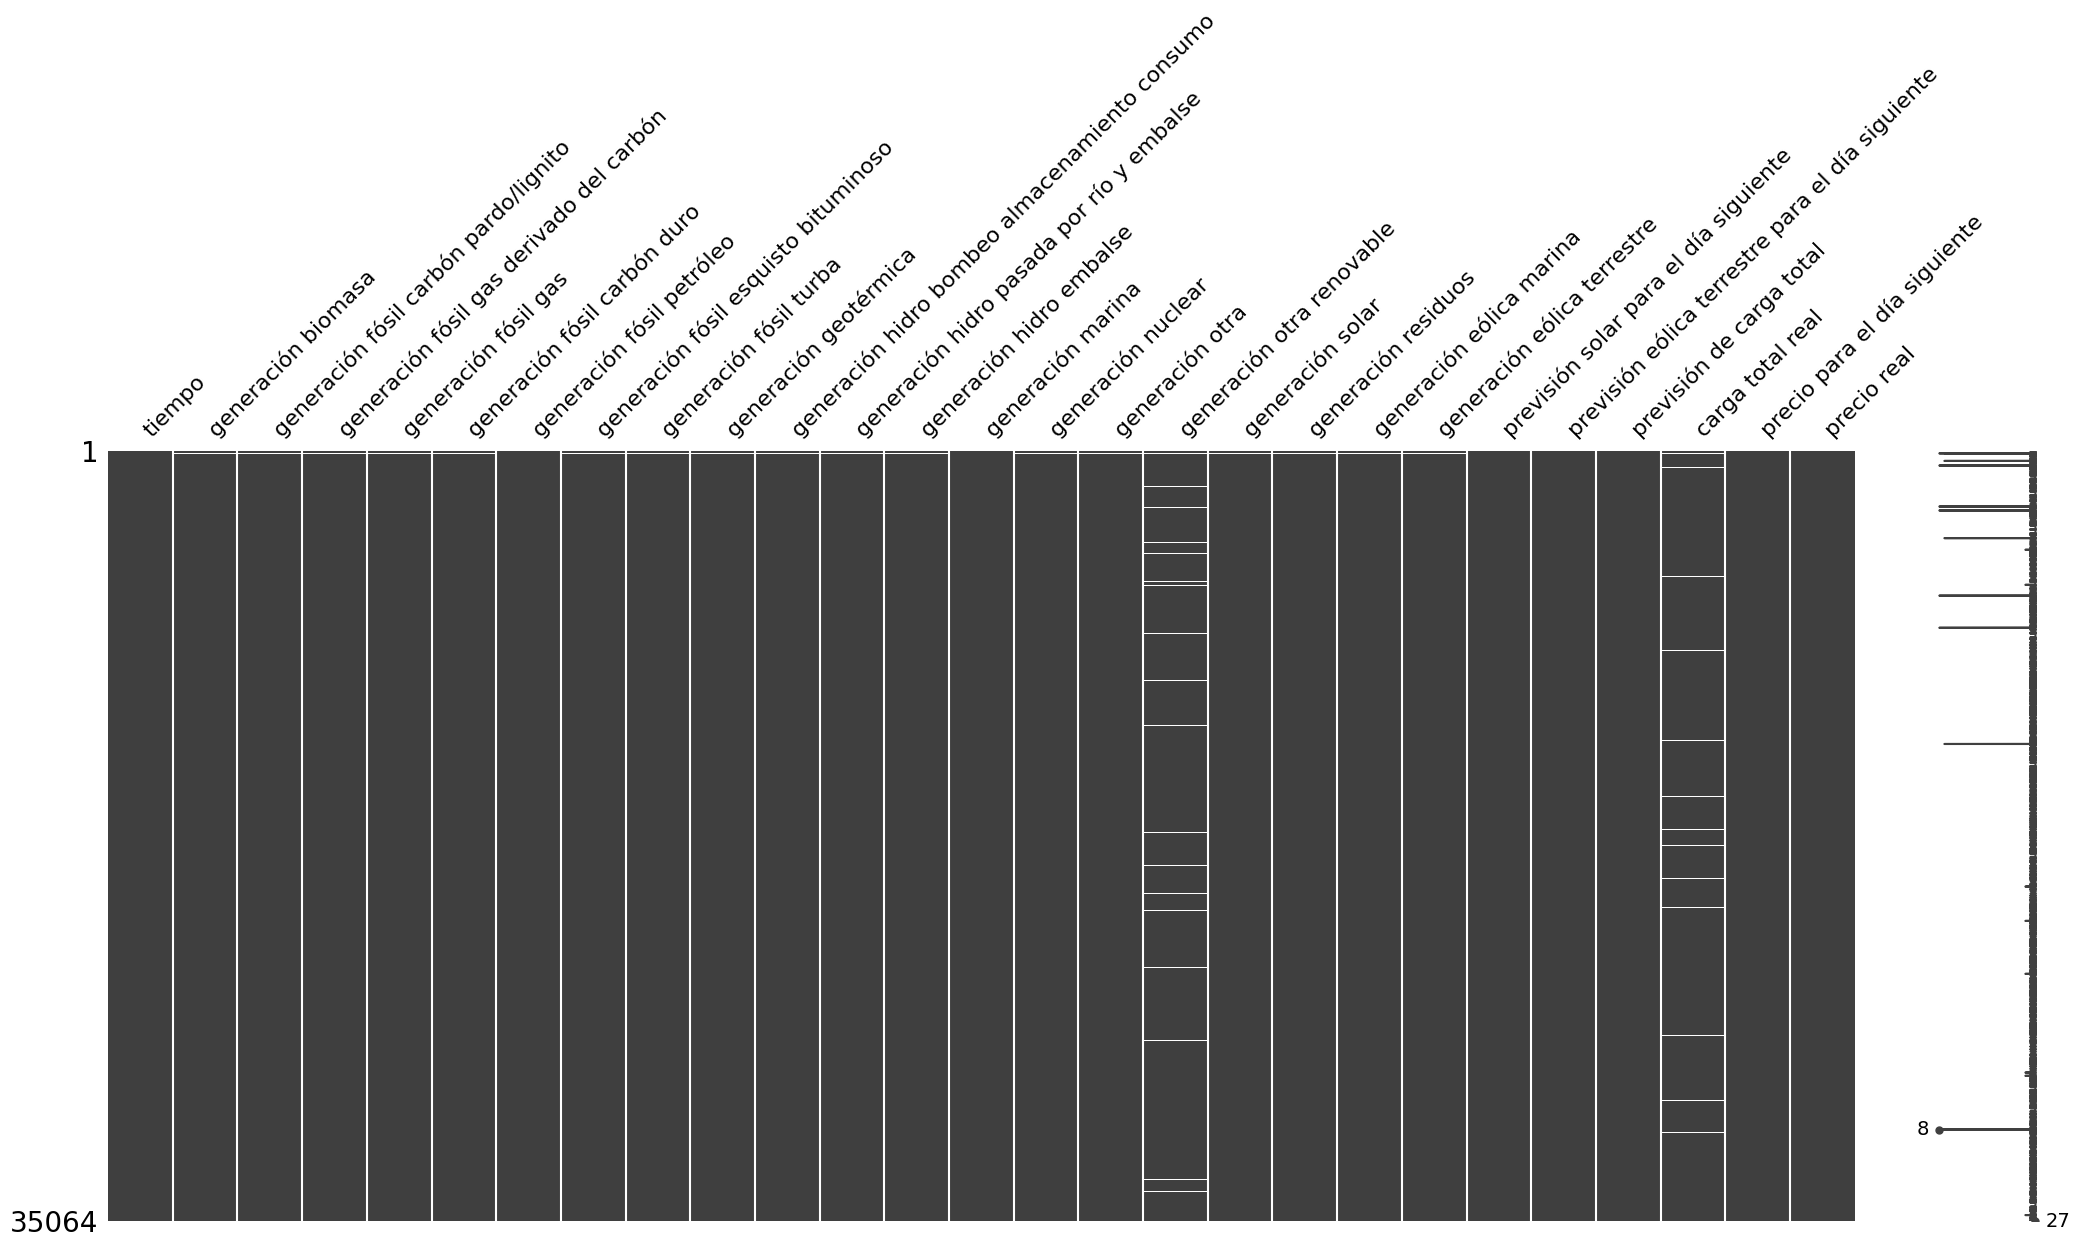

In [126]:
msno.matrix(df)